In [31]:
#So I want to use scikit learn's MLP regressor model to predict temperature 
import pandas as pd
from IPython.display import display
# Define column names
columns = ['year', 'month', 'day', 'hour', 'temperature', 'precipitation', 'u-wind', 'v-wind']

# Load data from CSV without headers
df = pd.read_csv("17.36N_78.5E.csv", names=columns) #Here we are only choosing one of the CSV files, 
                                                            #this can be expanded to make use of the full data set
df['temperature'] -= 273.15
#Now I have the dataset loaded and the temperature adjusted to celcius
df

,year,month,day,hour,temperature,precipitation,u-wind,v-wind
0,1980,1,1,0,17.59,0.0,-0.063355,2.81810
1,1980,1,1,1,17.69,0.0,0.038482,2.43180
2,1980,1,1,2,18.79,0.0,0.538340,2.22210
3,1980,1,1,3,23.40,0.0,1.049000,2.27480
4,1980,1,1,4,24.29,0.0,1.115400,2.75550
...,...,...,...,...,...,...,...,...
341875,2018,12,31,19,17.60,0.0,-1.388800,0.93791
341876,2018,12,31,20,17.70,0.0,-0.838810,0.99260
341877,2018,12,31,21,17.43,0.0,-0.669240,0.78582
341878,2018,12,31,22,15.64,0.0,-0.513420,0.40313


In [32]:
#This cell just trims the entire dataframe down to make testing faster, here we take the first 20% of the rows...
import numpy as np
percentage = 1  # Top 10% of dataframe rows...
df_top = df[(df.index > np.percentile(df.index, 100-(percentage*10)))]
num_rows = len(df)
top_rows = int(num_rows * percentage)
df_top = df.head(top_rows)
df = df_top
df

,year,month,day,hour,temperature,precipitation,u-wind,v-wind
0,1980,1,1,0,17.59,0.0,-0.063355,2.81810
1,1980,1,1,1,17.69,0.0,0.038482,2.43180
2,1980,1,1,2,18.79,0.0,0.538340,2.22210
3,1980,1,1,3,23.40,0.0,1.049000,2.27480
4,1980,1,1,4,24.29,0.0,1.115400,2.75550
...,...,...,...,...,...,...,...,...
341875,2018,12,31,19,17.60,0.0,-1.388800,0.93791
341876,2018,12,31,20,17.70,0.0,-0.838810,0.99260
341877,2018,12,31,21,17.43,0.0,-0.669240,0.78582
341878,2018,12,31,22,15.64,0.0,-0.513420,0.40313


In [33]:
#In this book, I am going to investigate the parameters of the dataframe using Principal Component Analysis

#Begin by dropping the temperature column which is what we are choosing to predict for this test.
#I've also dropped all of the time columns, here I am JUST looking at which - out of precipitation, u-wind and v-wind make up the most of the explained variance.
#And splitting the dataset into test,train and validation subsets.


from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
# Split data into train and test sets (80% train, 20% test)
# df = df.drop(columns=['day','year', 'month', 'hour'])
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['temperature']),  # Features (X)
    df['temperature'],  # Target variable (y)
    test_size=0.2,  # 20% for test set
    random_state=1  # For reproducibility
)

# Further split the train set into train and validation sets (60% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.25,  # 20% for validation set (0.25 * 0.8 = 0.2)
    random_state=1  # For reproducibility
)
print(X_train)
y_test

        year  month  day  hour  precipitation   u-wind   v-wind
69269   1987     11   26     5  -1.862600e-09 -1.50940 -0.97193
247217  2008      3   14    17   0.000000e+00 -0.80593  1.74080
132480  1995      2   11     0  -3.725300e-09  0.98948  0.97223
67705   1987      9   22     1  -1.862600e-09  2.28340 -1.35680
230650  2006      4   24    10   0.000000e+00  0.34947 -1.15140
...      ...    ...  ...   ...            ...      ...      ...
136241  1995      7   17    17   1.472800e-03  3.66700  2.52310
177909  2000      4   17    21   0.000000e+00  0.67546  3.56780
194252  2002      2   27    20  -1.862600e-09 -1.06020  1.99010
307344  2015      1   23     0   0.000000e+00 -1.13520  1.73120
1612    1980      3    8     4   2.150600e-11  2.12440 -2.59800

[205128 rows x 7 columns]


207134    27.03
279426    21.47
214576    31.42
273836    23.81
97966     23.54
          ...  
319529    32.54
237026    18.57
235456    22.48
61170     23.74
178763    38.40
Name: temperature, Length: 68376, dtype: float64

In [34]:
## Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Create an MLPRegressor with one hidden layer of 100 neurons
mlp_regressor = MLPRegressor(hidden_layer_sizes=(128, 64, 32, 16), activation='relu', solver='adam', max_iter=250, verbose=True, early_stopping=True)

# Fit the model to your training data
mlp_regressor.fit(X_train_scaled, y_train)


Iteration 1, loss = 28.55310615
Validation score: 0.829748
Iteration 2, loss = 2.51436549
Validation score: 0.854396
Iteration 3, loss = 2.22764532
Validation score: 0.865455
Iteration 4, loss = 2.06743792
Validation score: 0.860121
Iteration 5, loss = 1.95604453
Validation score: 0.876496
Iteration 6, loss = 1.90435018
Validation score: 0.877422
Iteration 7, loss = 1.86471926
Validation score: 0.885753
Iteration 8, loss = 1.83020807
Validation score: 0.887540
Iteration 9, loss = 1.80233598
Validation score: 0.889001
Iteration 10, loss = 1.77972619
Validation score: 0.891036
Iteration 11, loss = 1.76776105
Validation score: 0.890676
Iteration 12, loss = 1.75192181
Validation score: 0.882696
Iteration 13, loss = 1.73937762
Validation score: 0.893335
Iteration 14, loss = 1.72333331
Validation score: 0.887857
Iteration 15, loss = 1.72324417
Validation score: 0.895529
Iteration 16, loss = 1.70563227
Validation score: 0.895190
Iteration 17, loss = 1.69945433
Validation score: 0.894865
Itera

MLPRegressor(early_stopping=True, hidden_layer_sizes=(128, 64, 32, 16),
             max_iter=250, verbose=True)

In [35]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_scaled)
print(pca.explained_variance_)
print()

[1.25301467 1.21146477 1.02409511 1.00004522 0.99544977 0.79158253
 0.72438206]



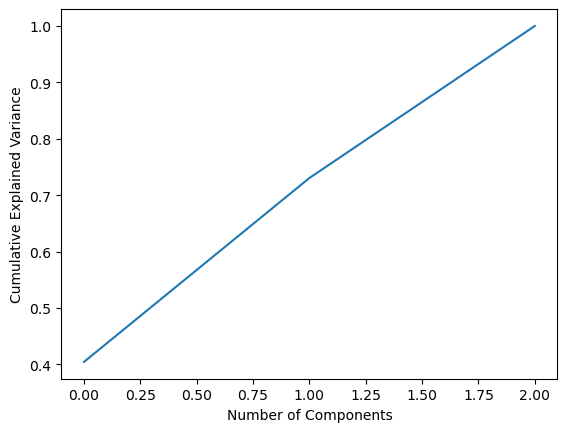

In [27]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [36]:
num_components = 2

pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [37]:
mlp_regressor_pca = MLPRegressor(hidden_layer_sizes=(128, 64, 32, 16), activation='relu', solver='adam', max_iter=250, verbose=True, early_stopping=True)

mlp_regressor_pca.fit(X_train_pca, y_train)


Iteration 1, loss = 36.81420516
Validation score: 0.105757
Iteration 2, loss = 14.46437995
Validation score: 0.095823
Iteration 3, loss = 14.35615469
Validation score: 0.100952
Iteration 4, loss = 14.25943357
Validation score: 0.120868
Iteration 5, loss = 14.20332050
Validation score: 0.121976
Iteration 6, loss = 14.21754094
Validation score: 0.117861
Iteration 7, loss = 14.15760532
Validation score: 0.128276
Iteration 8, loss = 14.14401352
Validation score: 0.127497
Iteration 9, loss = 14.13060090
Validation score: 0.126703
Iteration 10, loss = 14.12942923
Validation score: 0.126607
Iteration 11, loss = 14.13184943
Validation score: 0.123512
Iteration 12, loss = 14.13055099
Validation score: 0.120752
Iteration 13, loss = 14.12988421
Validation score: 0.124216
Iteration 14, loss = 14.09794110
Validation score: 0.127171
Iteration 15, loss = 14.09974404
Validation score: 0.130158
Iteration 16, loss = 14.11098151
Validation score: 0.124958
Iteration 17, loss = 14.09684588
Validation score

MLPRegressor(early_stopping=True, hidden_layer_sizes=(128, 64, 32, 16),
             max_iter=250, verbose=True)

In [38]:
# Evaluate MLP Regressor without PCA
score_without_pca = mlp_regressor.score(X_test_scaled, y_test)

# Evaluate MLP Regressor with PCA
score_with_pca = mlp_regressor_pca.score(X_test_pca, y_test)

print("MLP Regressor without PCA Score:", score_without_pca)
print("MLP Regressor with PCA Score:", score_with_pca)


ValueError: X has 7 features, but MLPRegressor is expecting 3 features as input.

In [1]:
def predictVariable(variableToPredict, encodeDates, dropOldDates, percentageSampleOfDataset, earlyStopping):
    #This function, loads the dataset from fresh, and predicts on specifically the variable you pass in. Used to explore which variables are easiest and most difficult to predict.
    #variableToPredict can be any column name e.g. temperature, precipitation, u-wind, v-wind
    #encodeDates boolean: Should you encode the basic date info into onehot encodes, to get: season	time_of_day	day_of_week	time_since_start
    #dropOldDates boolean: Should you drop the old date info from the dataframe
    #percentageSampleOfDataset: What percentage of the overall csv file you loaded in should you take.
    #Early stopping: Should the model stop training if there is no sizable improvement in validation accuracy over the 10 epochs.
    
    import pandas as pd
    from IPython.display import display
    # Define column names
    columns = ['year', 'month', 'day', 'hour', 'temperature', 'precipitation', 'u-wind', 'v-wind']

    # Load data from CSV without headers
    df = pd.read_csv("17.36N_78.5E.csv", names=columns) #Here we are only choosing one of the CSV files, 
                                                            #this can be expanded to make use of the full data set
    df['temperature'] -= 273.15

    if percentageSampleOfDataset!=1:
        import numpy as np
        df_top = df[(df.index > np.percentile(df.index, 100-(percentageSampleOfDataset*10)))]
        num_rows = len(df)
        top_rows = int(num_rows * percentageSampleOfDataset)
        df_top = df.head(top_rows)
        df = df_top
        print("Loaded Sample of "+ str(percentageSampleOfDataset) + " of the dataset.")
    
    if(encodeDates):
        import pandas as pd
        #This cell produces new one-hot encoded values from the date columns, classifying them as seasons, times of day
        #We also make the day of week cyclic, classifying them to monday,tuesday,wednesday... as numbers 0-6
        print(df['hour'].unique())
        df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
        df['season'] = df['datetime'].dt.month // 3 + 1  # Divide months into seasons
        df['time_of_day'] = pd.cut(df['hour'], bins=[-1, 6, 12, 18, 24], labels=[0, 1, 2, 3]) # 0,1,2,3 represent night,morning,afternoon,evening
        df['day_of_week'] = df['datetime'].dt.day_of_week
        df['time_since_start'] = (df['datetime'] - df['datetime'].min()).dt.days
        df.drop(columns=['datetime'], inplace=True)
    
    if(dropOldDates):
        df = df.drop(columns=['year', 'month', 'day', 'hour'])
    
   
    
    from sklearn.neural_network import MLPRegressor
    from sklearn.model_selection import train_test_split
    # Split data into train and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=[variableToPredict]),  # Features (X)
        df[variableToPredict],  # Target variable (y)
        test_size=0.2,  # 20% for test set
        random_state=1  # For reproducibility
    )
    print(X_train, y_train)

    # Further split the train set into train and validation sets (60% train, 20% validation)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train,
        test_size=0.25,  # 20% for validation set (0.25 * 0.8 = 0.2)
        random_state=1  # For reproducibility
    )

    # Create an MLPRegressor with one hidden layer of 100 neurons
    model = MLPRegressor(hidden_layer_sizes=(128, 64, 32, 16), activation='relu', solver='adam', max_iter=250, verbose=False, early_stopping=earlyStopping)

    # Fit the model to your training data
    print("Fitting model to predict "+ variableToPredict)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")


    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals':(abs(y_test-y_pred))})
    display(df_results.head())
    print()
    from sklearn.metrics import r2_score
    score = r2_score(y_test, y_pred)
    print("The accuracy of our model is {}%".format(round(score, 5) *100))


predictVariable("temperature", True, True, 0.4, True)
predictVariable("precipitation", True, True, 0.4, True)
predictVariable("temperature", True, True, 0.4, True)
predictVariable("u-wind", True, True, 0.4, True)
predictVariable("v-wind", True, True, 0.4, True)
predictVariable("season", True, True, 0.4, True)





Loaded Sample of 0.4 of the dataset.
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
        precipitation    u-wind   v-wind  season time_of_day  day_of_week  \
55213    0.000000e+00  0.011882 -1.76020       2           2            5   
2441     3.421500e-18  1.723300 -1.77510       2           2            4   
47137    3.725300e-09  0.061044  3.45030       2           0            5   
61877   -6.620900e-10 -1.637800  0.62871       1           0            3   
55809    0.000000e+00  1.976600 -0.64783       2           1            2   
...               ...       ...      ...     ...         ...          ...   
73349   -1.862600e-09  0.758670 -2.54910       2           0            5   
109259   8.238300e-04  2.996100 -0.87566       3           1            3   
50057    3.725300e-09  0.990130  1.18800       4           2            0   
5192     1.119300e-05  4.522200  1.04590       3           1            0   
128037   9.372700e-05  3.824200 -0.23858  

,Actual,Predicted,Residuals
73949,37.71,27.746733,9.963267
32534,25.17,25.905304,0.735304
111452,23.14,22.185819,0.954181
26846,23.62,22.018204,1.601796
61615,23.48,29.231840,5.751840



The accuracy of our model is 64.732%
Loaded Sample of 0.4 of the dataset.
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
        temperature    u-wind   v-wind  season time_of_day  day_of_week  \
55213         38.41  0.011882 -1.76020       2           2            5   
2441          32.29  1.723300 -1.77510       2           2            4   
47137         30.17  0.061044  3.45030       2           0            5   
61877         24.72 -1.637800  0.62871       1           0            3   
55809         42.73  1.976600 -0.64783       2           1            2   
...             ...       ...      ...     ...         ...          ...   
73349         40.84  0.758670 -2.54910       2           0            5   
109259        35.73  2.996100 -0.87566       3           1            3   
50057         25.70  0.990130  1.18800       4           2            0   
5192          27.99  4.522200  1.04590       3           1            0   
128037        24.80  3.824

,Actual,Predicted,Residuals
73949,2.060800e-05,0.006817,0.006796
32534,1.078800e-04,0.001257,0.001149
111452,-1.862600e-09,0.002796,0.002796
26846,3.725300e-09,-0.005562,0.005562
61615,-1.502500e-09,-0.004968,0.004968



The accuracy of our model is -5756.559%
Loaded Sample of 0.4 of the dataset.
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
        precipitation    u-wind   v-wind  season time_of_day  day_of_week  \
55213    0.000000e+00  0.011882 -1.76020       2           2            5   
2441     3.421500e-18  1.723300 -1.77510       2           2            4   
47137    3.725300e-09  0.061044  3.45030       2           0            5   
61877   -6.620900e-10 -1.637800  0.62871       1           0            3   
55809    0.000000e+00  1.976600 -0.64783       2           1            2   
...               ...       ...      ...     ...         ...          ...   
73349   -1.862600e-09  0.758670 -2.54910       2           0            5   
109259   8.238300e-04  2.996100 -0.87566       3           1            3   
50057    3.725300e-09  0.990130  1.18800       4           2            0   
5192     1.119300e-05  4.522200  1.04590       3           1            0   
1

,Actual,Predicted,Residuals
73949,37.71,28.503277,9.206723
32534,25.17,26.920595,1.750595
111452,23.14,25.588528,2.448528
26846,23.62,25.544968,1.924968
61615,23.48,32.838107,9.358107



The accuracy of our model is 42.998999999999995%
Loaded Sample of 0.4 of the dataset.
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
        temperature  precipitation   v-wind  season time_of_day  day_of_week  \
55213         38.41   0.000000e+00 -1.76020       2           2            5   
2441          32.29   3.421500e-18 -1.77510       2           2            4   
47137         30.17   3.725300e-09  3.45030       2           0            5   
61877         24.72  -6.620900e-10  0.62871       1           0            3   
55809         42.73   0.000000e+00 -0.64783       2           1            2   
...             ...            ...      ...     ...         ...          ...   
73349         40.84  -1.862600e-09 -2.54910       2           0            5   
109259        35.73   8.238300e-04 -0.87566       3           1            3   
50057         25.70   3.725300e-09  1.18800       4           2            0   
5192          27.99   1.119300e-05  1.0

,Actual,Predicted,Residuals
73949,2.1897,2.015667,0.174033
32534,1.6162,0.676016,0.940184
111452,1.8375,0.479078,1.358422
26846,-1.9213,0.321085,2.242385
61615,1.6345,0.737432,0.897068



The accuracy of our model is 10.020999999999999%
Loaded Sample of 0.4 of the dataset.
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
        temperature  precipitation    u-wind  season time_of_day  day_of_week  \
55213         38.41   0.000000e+00  0.011882       2           2            5   
2441          32.29   3.421500e-18  1.723300       2           2            4   
47137         30.17   3.725300e-09  0.061044       2           0            5   
61877         24.72  -6.620900e-10 -1.637800       1           0            3   
55809         42.73   0.000000e+00  1.976600       2           1            2   
...             ...            ...       ...     ...         ...          ...   
73349         40.84  -1.862600e-09  0.758670       2           0            5   
109259        35.73   8.238300e-04  2.996100       3           1            3   
50057         25.70   3.725300e-09  0.990130       4           2            0   
5192          27.99   1.11930

,Actual,Predicted,Residuals
73949,3.29800,-0.340492,3.638492
32534,1.21280,0.108292,1.104508
111452,-0.52528,0.469424,0.994704
26846,-0.37781,0.261846,0.639656
61615,1.79950,0.370955,1.428545



The accuracy of our model is 5.721%
Loaded Sample of 0.4 of the dataset.
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
        temperature  precipitation    u-wind   v-wind time_of_day  \
55213         38.41   0.000000e+00  0.011882 -1.76020           2   
2441          32.29   3.421500e-18  1.723300 -1.77510           2   
47137         30.17   3.725300e-09  0.061044  3.45030           0   
61877         24.72  -6.620900e-10 -1.637800  0.62871           0   
55809         42.73   0.000000e+00  1.976600 -0.64783           1   
...             ...            ...       ...      ...         ...   
73349         40.84  -1.862600e-09  0.758670 -2.54910           0   
109259        35.73   8.238300e-04  2.996100 -0.87566           1   
50057         25.70   3.725300e-09  0.990130  1.18800           2   
5192          27.99   1.119300e-05  4.522200  1.04590           1   
128037        24.80   9.372700e-05  3.824200 -0.23858           3   

        day_of_week  ti

,Actual,Predicted,Residuals
73949,3,2.027439,0.972561
32534,4,2.906236,1.093764
111452,4,3.155032,0.844968
26846,1,3.150533,2.150533
61615,1,2.905876,1.905876



The accuracy of our model is 14.868%
